
### Ананьев Роман

In [311]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

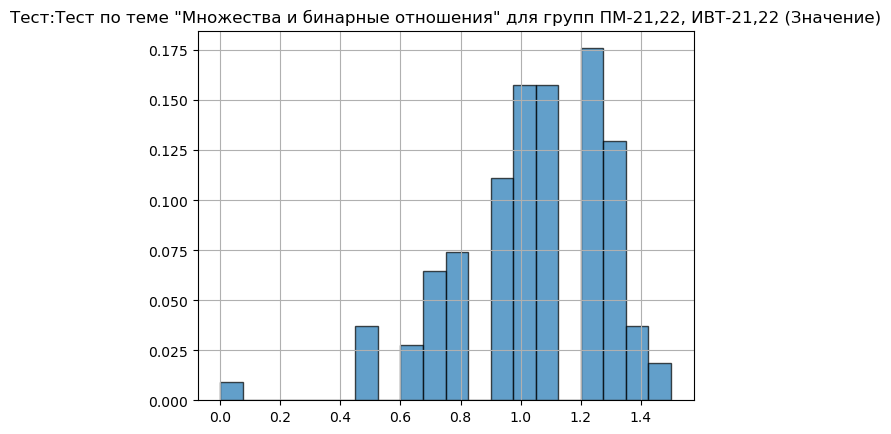

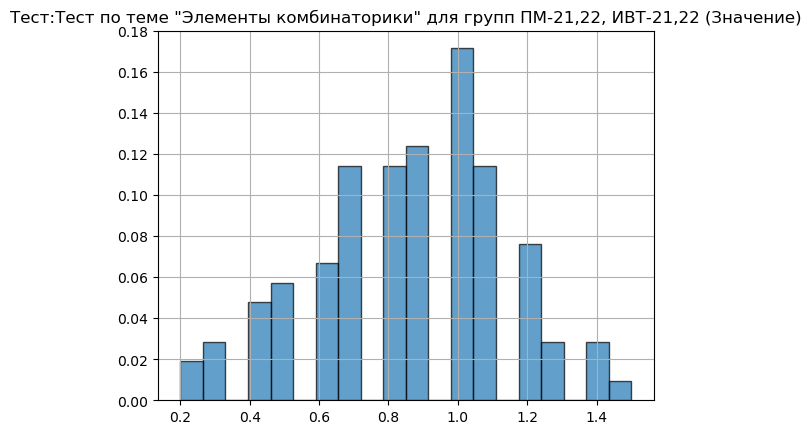

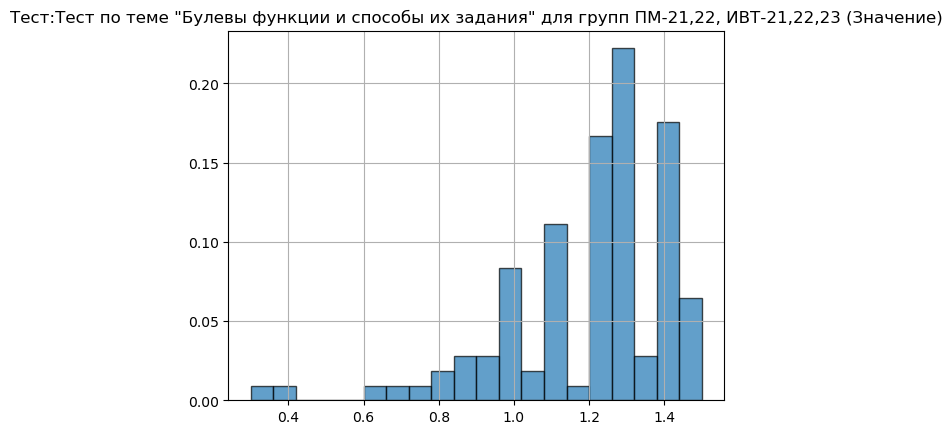

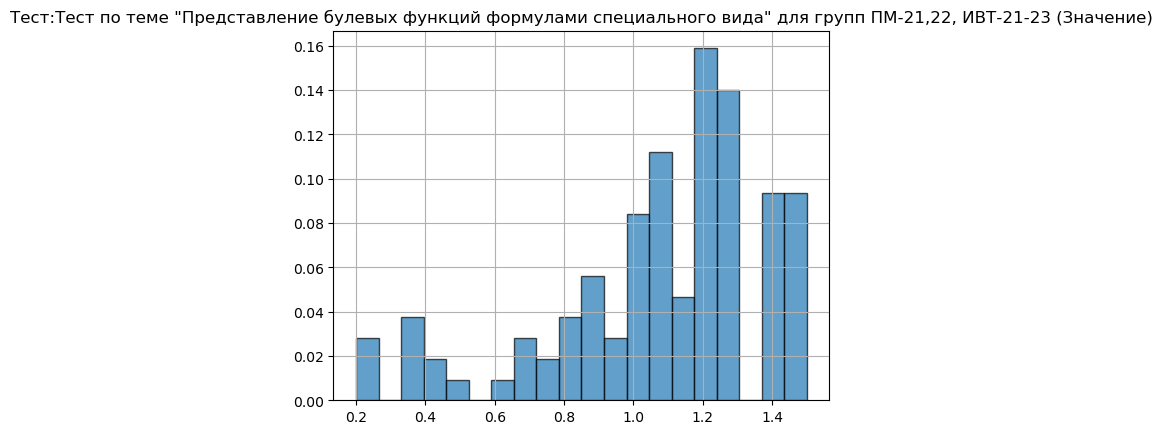

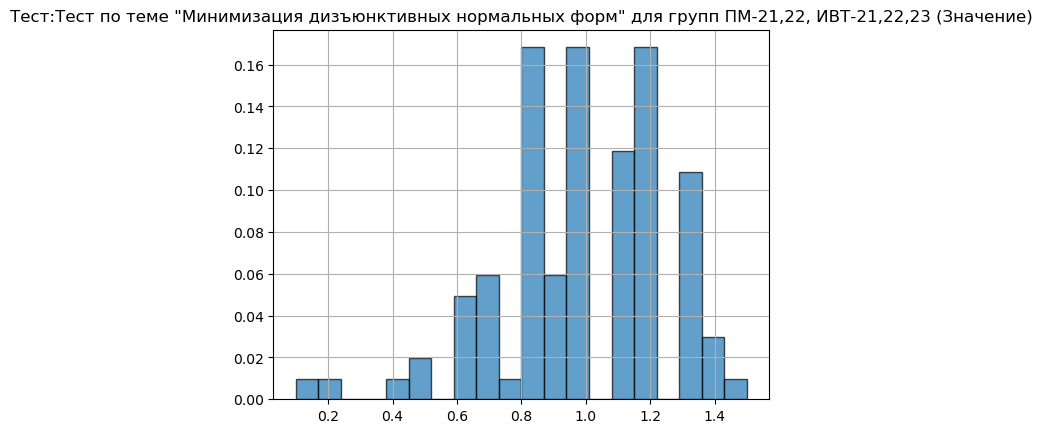

In [312]:
# считаваем данные и анализируем график для выдвижения гипотезы о рапределение
sample = pd.read_excel("Data_7_1.xlsx", header = 0)
s = []

for j in range(5):
    s.append([i[j] for i in sample.values if i[j] != '-'])
    
for j in range(5):  
    plt.hist(s[j], bins=20, weights=np.ones_like(s[j])/len(s[j]), edgecolor='black', alpha=0.7)

    plt.title(sample.columns[j])
    plt.grid(True)
    plt.show()

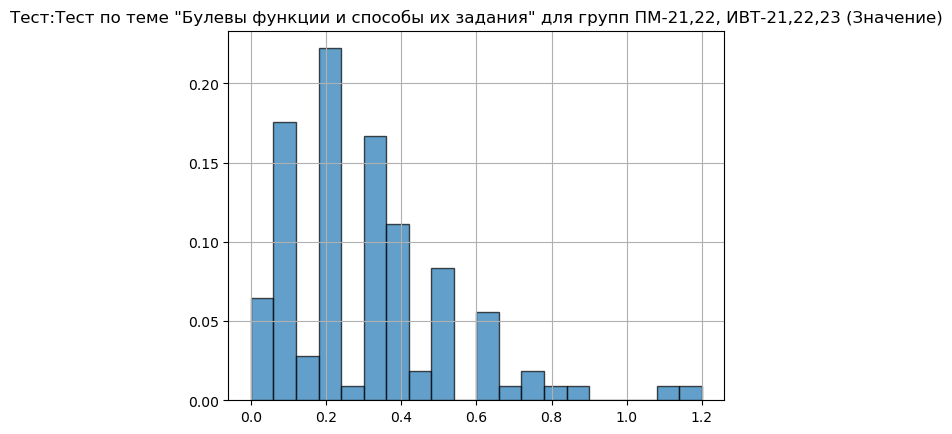

In [313]:
s[2] = [1.5 - s for s in s[2]]

plt.hist(s[2], bins=20, weights=np.ones_like(s[2])/len(s[2]), edgecolor='black', alpha=0.7) # похоже на показтельное распределение
plt.title(sample.columns[2])
plt.grid(True)
plt.show()


susp_exp = {sample.columns[2]: s[2]}
susp_norm = {sample.columns[1]: s[1]} # похоже на нормальное распределение(2-й график)

# Задание 1
<!-- В файле «Data_7_1» приведены массивы результатов
наблюдения нескольких случайных величин. Будем рассматривать каж-
дый из массивов как случайную выборку из генеральной совокупности с
неизвестным законом распределения (для каждого массива генеральная
совокупность своя). Экспортируйте данные. Для каждой из выборок
постройте гистограмму относительных частот и на основе визуального
качественного анализа гистограмм отберите две выборки: выборку А,
позволяющую выдвинуть гипотезу о принадлежности нормальному
распределению генеральной совокупности; выборку В, позволяющую
выдвинуть гипотезу о показательном распределении генеральной сово-
купности. Если среди массивов данных нет ни одного похожего на вы-
борку из генеральной совокупности с показательным законом распреде-
ления, то попробуйте преобразовать один из них таким образом, чтобы
к полученной выборке гипотеза о показательном распределении гене-
ральной совокупности подходила.
1) Проверьте гипотезу о том, что выборка А взята из генеральной
совокупности, имеющей нормальное распределение, с помощью крите-
рия согласия хи-квадрат. Решение должно быть подробным, с выполне-
нием всех шагов алгоритма и отслеживанием корректности применения.
Сделайте выводы.
2) Проверьте гипотезу о том, что выборка В (исходная или полу-
ченная путем преобразования) взята из генеральной совокупности,
имеющей показательное распределение. Используйте критерий согласия
хи-квадрат. Решение должно быть подробным, с выполнением всех ша-
гов алгоритма и отслеживанием корректности применения. Сделайте
выводы. -->

#### 1.1

In [256]:
#1)
# alpha = 0.1
#оценим параметры m и sigma
m = np.mean(s[1])
sigma = np.sqrt(np.var(s[1], ddof=1))

In [257]:
# создаем интервалы
delta = np.linspace(0, 1.5 , 11)
delta[0] = - np.inf
delta[10] = np.inf
delta

array([-inf, 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35,  inf])

In [258]:
# значения n_k
n = [0] * 10
for i in range(1,11):
    n[i - 1] = [s for s in s[1] if delta[i-1] <= s <= delta[i]]
n_1 = [len(s) for s in n]
n_1

[0, 5, 8, 13, 19, 12, 31, 20, 11, 4]

In [259]:
#ожидаемая частота 
p = []
for i in range(10):
    p.append(sts.norm.cdf((delta[i + 1] - m) / sigma) -  sts.norm.cdf((delta[i] - m) / sigma))
    
p

[0.005875213949566139,
 0.017454106348077272,
 0.04892303119085317,
 0.10417839468111732,
 0.16855749109032253,
 0.207234565015611,
 0.19361387611237735,
 0.13745656829145592,
 0.07415188516299198,
 0.042554868157627324]

In [260]:
np = [len(s[1]) * p_k for p_k in p]
np

[0.6168974647044446,
 1.8326811665481135,
 5.136918275039583,
 10.93873144151732,
 17.698536564483867,
 21.759629326639153,
 20.32945699179962,
 14.43293967060287,
 7.785947942114158,
 4.468261156550869]

In [261]:
# соединяем np_k < 5
np[2] += np[0] + np[1]
np[8] = np[8] + np[9]
np = np[2:8]
np

[7.58649690629214,
 10.93873144151732,
 17.698536564483867,
 21.759629326639153,
 20.32945699179962,
 14.43293967060287]

In [262]:
n_1[2] += n_1[0] + n_1[1]
n_1[8] = n_1[8] + n_1[9]
n_1 = n_1[2:8]
n_1

[13, 13, 19, 12, 31, 20]

In [264]:
z_v = sum((x - y)**2 / y for x, y in zip(n_1, np)) 
chi2 = sts.chi2(5).ppf(0.9)
print(f"z_выб = {z_v} > z_1-a = {chi2} => гипотеза о нормальном распределении отклоняется")

z_выб = 16.47251622896547 > z_1-a = 9.236356899781123 => гипотеза о нормальном распределении отклоняется


#### 1.2

In [270]:
#2)
# alpha = 0.1
#оценим параметры lambda
lamda = 1 / np.mean(s[2]) 
lamda

3.263825929283771

In [271]:
delta

array([-inf, 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35,  inf])

In [289]:
# значения n_k
n = [0] * 10
for i in range(1,11):
    n[i - 1] = [s for s in s[2] if delta[i-1] <= s <= delta[i]]
n_1 = [len(s) for s in n]
n_1

[28, 26, 31, 14, 9, 3, 0, 2, 1, 0]

In [273]:
#ожидаемая частота 
p = []
for i in range(10):
    p.append(sts.expon(0, 1 / lamda).cdf(delta[i + 1]) -  sts.expon(0, 1 / lamda).cdf(delta[i]))
    
p

[0.3871125035853635,
 0.23725641315323537,
 0.14541148906580315,
 0.08912088348346425,
 0.0546210751564411,
 0.03347657400410675,
 0.020517373629916458,
 0.012574841757043043,
 0.007706963282284374,
 0.01220188288234203]

In [283]:
np = [len(s[2]) * p_k for p_k in p]
np

[41.80815038721926,
 25.62369262054942,
 15.70444081910674,
 9.625055416214138,
 5.899076116895639,
 3.615469992443529,
 2.2158763520309774,
 1.3580829097606486,
 0.8323520344867124,
 1.3178033512929392]

In [284]:
# соединяем np_k < 5
np[5] += np[6] + np[7] + np[8] + np[9]
np_k = np[:6]
np_k

[41.80815038721926,
 25.62369262054942,
 15.70444081910674,
 9.625055416214138,
 5.899076116895639,
 9.339584640014806]

In [290]:
n_1[5] += n_1[6] + n_1[7] + n_1[8] + n_1[9]
n_1_k = n_1[:6]
n_1_k

[28, 26, 31, 14, 9, 6]

In [294]:
z_v = sum((x - y)**2 / y for x, y in zip(n_1_k, np_k) )
chi2 = sts.chi2(4).ppf(0.9)
print(f"z_выб = {z_v} > z_1-a = {chi2} => гипотеза о показательном распределении отклоняется")

z_выб = 24.276084571893872 > z_1-a = 7.779440339734858 => гипотеза о показательном распределении отклоняется


# Задание 2
<!-- 1) Преобразуйте данные, применив к выборкам А, В преобразова-
ние Бокса-Кокса (далее АА, ВВ – преобразованные данные).
2) Постройте гистограммы А и АА, В и ВВ. Сопоставьте гисто-
граммы прообразов и образов. Результаты прокомментируйте.
3) С помощью критерия Шапиро – Уилка (используйте функцию
shapiro() модуля scipy.stats) проверьте для всех четырех вы-
борок гипотезы о том, что выборки принадлежат нормально распреде-
ленным генеральным совокупностям. Результаты образов и прообразов
сопоставьте и прокомментируйте.
8
4) Для всех четырех выборок постройте Q-Q – график. Сопоставь-
те графики прообразов и образов. -->

#### 2.1 2.2

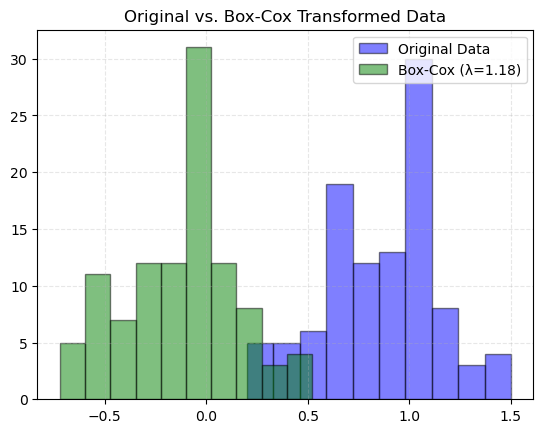

In [315]:
s_1, fitted_lambda = sts.boxcox(s[1])  

plt.hist(s[1], color='blue', edgecolor='black', alpha=0.5, label='Original Data')
plt.hist(s_1, color='green', edgecolor='black', alpha=0.5, label=f'Box-Cox (λ={fitted_lambda:.2f})')
plt.title('Original vs. Box-Cox Transformed Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

После преобразования Бокса - Кокса:
Распределение стало ближе к нормальному (симметричному).
"Хвост" справа сократился, а частота значений в центральной части увеличилась.

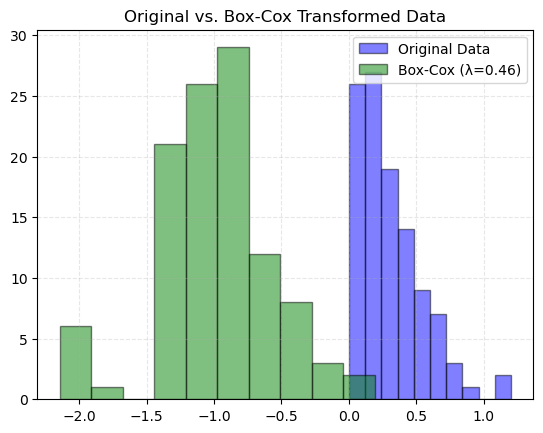

In [323]:
s_2 = [s + 1e-5 for s in s[2]]
s_2, fitted_lambda = sts.boxcox(s_2) 

plt.hist(s[2], color='blue', edgecolor='black', alpha=0.5, label='Original Data')
plt.hist(s_2, color='green', edgecolor='black', alpha=0.5, label=f'Box-Cox (λ={fitted_lambda:.2f})')
plt.title('Original vs. Box-Cox Transformed Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Результат: Распределение стало ближе к симметричному (нормальному). "Хвост" слева сократился, а частота значений в центре увеличилась.

#### 2.3

1-я выборка

In [332]:
# до преобразования
stat, p_value = sts.shapiro(s[1])
p_value

0.08102016896009445

In [329]:
#после преобразования
stat, p_value = sts.shapiro(s_1)
p_value

0.14272278547286987

2-я выборка

In [330]:
# до преобразования
stat, p_value = sts.shapiro(s[2])
p_value

3.5369299666854204e-07

In [331]:
#после преобразования
stat, p_value = sts.shapiro(s_2)
p_value

0.0011254731798544526

В обоих случаях значения p-value больше помсле преобразования Бокса-Кокса, это значит, что после данного преобразования величины нормализуются 